
## Web Scraping con Amazon Rekognition

Vamos a hacer un simple proceso de web scraping en el que:

- Descargaremos el código de una web
- Identificaremos todas las URLs que contienen fotografías
- Descargaremos las fotografías y las enviaremos a AWS rekognition para extraer etiquetas y celebridades
- Integraremos el proceso con pandas para crear un dataset estructurado

In [4]:
aws_access_key_id="ASIAZVRTK57HHD743TN"
aws_secret_access_key="qKlHy6MOkIttAzOumw7aqu/TjMuLoKZl6+Zw/S1"
aws_session_token="FwoGZXIvYXdzEKr//////////wEaDJdzrch+CbSadLXcgSLMfcC9p8XRjoGxx6e0gLbWlIMIAWxI5xjwokQKAZfttqgZ3YNxDWb//JF5N6uzRMg7jQ8VUqwB7UCmuPbBHqCMqIGJS/VNROVo7mh1WP9aEV8c/L48Tynm++KW67LN0l7m4oodj9ganjNHspxw9logwu2NENkIpYBn4APQXa9CMkCI3GRlEPnboleSiNqZ6akic4+7PGAJNoNCYdacGXoz9Kfa2e+NJ7URUMBAB+JXSEEuJydaFWMW+eokFYL1vATYlomTsTudnMaVWHh3iii3O33BTItNV2D6iEd0/WrIeUTdVdQ2fhqqIMYax4n86URlrGQDu4KVJPX5B3YQzPMueFo"

### Librerías

In [5]:
import re
import requests

from IPython.display import Image
from ipywidgets import widgets

## Mini Web-Scraping

### Descargando el codigo fuente de una web


In [6]:
res = requests.get("https://elpais.com/internacional/")

In [7]:
res.text

'<!DOCTYPE html><html lang="es"><head><title>Internacional en EL PAÍS</title><meta name="lang" content="es"/><meta name="author" content="Ediciones El País"/><meta name="robots" content="index,follow"/><meta name="description" content="Sigue la última hora de la actualidad internacional con EL PAÍS."/><meta name="organization" content="Ediciones EL PAÍS S.L."/><meta property="article:publisher" content="https://www.facebook.com/elpaisinternacional/"/><meta property="article:modified_time"/><meta property="og:description" content="Sigue la última hora de la actualidad internacional con EL PAÍS."/><meta name="date" scheme="W3CDTF"/><meta property="og:updated_time"/><meta property="og:image" content="https://imagenes.elpais.com/resizer/oVhtuq26xEmayL2Qt2h6dclZPy0=/300x300/arc-anglerfish-eu-central-1-prod-prisa.s3.amazonaws.com/public/GFIRWKGYDBD2HPWKNFLB4LZXCM.png"/><meta property="og:image:width" content="300"/><meta property="og:image:height" content="300"/><meta property="og:url" conte

### Obteniendo todas las imágenes del código fuente

En un proceso de scraping más complejo tendríamos que navegar por el código HTML. Pero en nuestro caso nos bastará con una expresión regular para extraer las URLS que contengan imágenes.

In [8]:
pics = re.findall("https?://[-_/.\w]+\.jpg", res.text)

In [9]:
pics

['https://cloudfront-eu-central-1.images.arcpublishing.com/prisa/FYQSUD25IJDURDUZRZNNGTWWCA.jpg',
 'https://elpais.com/miperfil/avatares/5/71/rafademiguel.jpg',
 'https://cloudfront-eu-central-1.images.arcpublishing.com/prisa/H5UQZ22CJBGYNI6R6VJGWXO2KM.jpg',
 'https://elpais.com/miperfil/avatares/C/D1/alvarosanchezl.jpg',
 'https://cloudfront-eu-central-1.images.arcpublishing.com/prisa/XOV6BNDGZFFO5HPU4M4AYW54OQ.jpg',
 'https://elpais.com/miperfil/avatares/6/EB/mariasahuquillo.jpg',
 'https://elpais.com/miperfil/avatares/3/EE/angelesespinosa.jpg',
 'https://cloudfront-eu-central-1.images.arcpublishing.com/prisa/M7I5RUAQXNHTJK4U6PAJRFAYLA.jpg',
 'https://elpais.com/miperfil/avatares/C/D1/alvarosanchezl.jpg',
 'https://cloudfront-eu-central-1.images.arcpublishing.com/prisa/QB467PJ54RCADEVHSMRSN3HBBA.jpg',
 'https://cloudfront-eu-central-1.images.arcpublishing.com/prisa/RXOV35KDUVFCXAFKMTKGLGXUUU.jpg',
 'https://cloudfront-eu-central-1.images.arcpublishing.com/prisa/RXOV35KDUVFCXAFKMTKGLG

In [10]:
len(pics)

260

### Resumen de la página



In [11]:
for i, pic in enumerate(pics):
    display(i)
    display(Image(url=pic))

0

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

31

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

47

48

49

50

51

52

53

54

55

56

57

58

59

60

61

62

63

64

65

66

67

68

69

70

71

72

73

74

75

76

77

78

79

80

81

82

83

84

85

86

87

88

89

90

91

92

93

94

95

96

97

98

99

100

101

102

103

104

105

106

107

108

109

110

111

112

113

114

115

116

117

118

119

120

121

122

123

124

125

126

127

128

129

130

131

132

133

134

135

136

137

138

139

140

141

142

143

144

145

146

147

148

149

150

151

152

153

154

155

156

157

158

159

160

161

162

163

164

165

166

167

168

169

170

171

172

173

174

175

176

177

178

179

180

181

182

183

184

185

186

187

188

189

190

191

192

193

194

195

196

197

198

199

200

201

202

203

204

205

206

207

208

209

210

211

212

213

214

215

216

217

218

219

220

221

222

223

224

225

226

227

228

229

230

231

232

233

234

235

236

237

238

239

240

241

242

243

244

245

246

247

248

249

250

251

252

253

254

255

256

257

258

259

## Extrayendo datos con AWS Rekognition

Ahora podemos utilizar rekognition para obtener etiquetas y labels de nuestras imágenes.


#### Utilizamos rekognition para extraer celebrities y labels de una imagen concreta

In [12]:
import boto3



rekognition = boto3.client(
    'rekognition',
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
    aws_session_token=aws_session_token,
    region_name='us-east-1'
)


In [18]:
def print_image_attributes(pic_number):
    """
        La funcion recibe el numero de la imagen seleccionada del 
        vector pics y el output para imprimir la salida
    """
    # Get picture bytes
    pic_url = pics[pic_number]
    pic_raw = requests.get(pic_url).content

    # Get labels
    response_labels = rekognition.detect_labels(
        Image={"Bytes": pic_raw}
    )
    
    labels = [label["Name"] for label in response_labels["Labels"]]
    
    # Get celebrity
    response_celeb = rekognition.recognize_celebrities(
        Image={"Bytes": pic_raw}
    )
    
    celebrities = response_celeb["CelebrityFaces"]
    if celebrities:
        celebrity_names = [c["Name"] for c in celebrities]
    else:
        celebrity_names = "-"
    
    display(Image(pic_raw))
    print("Labels:")
    print(labels)
    
    print("Celebrities:")
    print(celebrity_names)

#### Test

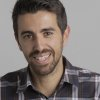

Labels:
['Face', 'Human', 'Person', 'Man', 'Performer', 'Head', 'Hair', 'Photography', 'Photo', 'Portrait', 'Selfie', 'Clothing', 'Apparel', 'Shirt', 'People', 'Beard', 'Haircut', 'Dating']
Celebrities:
-


In [20]:
print_image_attributes(3)

## Integración en un proceso con pandas

### Creación del dataframe



Concretamente el dataset tendra tres columas:

```
site: el nombre del periodico
date: la fecha de hoy
url: La url de la imagen
```

In [21]:
import pandas as pd
from datetime import datetime

In [22]:
df = pd.DataFrame(data={
    "site": "elpais", 
    "date": datetime.today().strftime('%Y-%m-%d'), 
    "url": pics[:5]
})

In [23]:
df.head()

,site,date,url
0,elpais,2020-06-30,https://cloudfront-eu-central-1.images.arcpubl...
1,elpais,2020-06-30,https://elpais.com/miperfil/avatares/5/71/rafa...
2,elpais,2020-06-30,https://cloudfront-eu-central-1.images.arcpubl...
3,elpais,2020-06-30,https://elpais.com/miperfil/avatares/C/D1/alva...
4,elpais,2020-06-30,https://cloudfront-eu-central-1.images.arcpubl...


### Aumentando el dataset con rekognition

En la siguiente fase aumentaremos el dataset invocando recognition para crear dos nuevas columnas:

```
labels: la lista de labels que hay en la imagen
celebrities: La lista de celebrities que hay en la imagen
```

In [26]:
def extract_labels(url):
    picture=requests.get(url).content
    
    response_labels=rekognition.detect_labels(
        Image={"Bytes": picture}
    )
    labels=[label["Name"]for label in response_labels["Labels"]]
    return labels

In [27]:
extract_labels(pics[0])

['Human',
 'Person',
 'Apparel',
 'Clothing',
 'Text',
 'Sitting',
 'Finger',
 'Advertisement',
 'Hair',
 'People',
 'Crowd',
 'Suit',
 'Overcoat',
 'Coat',
 'Hat',
 'Poster']

In [32]:
def extract_celebrities(url):
    picture=requests.get(url).content
    
    response_celeb=rekognition.recognize_celebrities(
        Image={"Bytes": picture}
    )
    celebrities = response_celeb["CelebrityFaces"]
    if celebrities:
        celebrity_names = [c["Name"] for c in celebrities]
    else:
        celebrity_names = []
    return celebrity_names

In [33]:
extract_celebrities(pics[0])

['Pargat Singh']

In [34]:
df["celebrities"] = df.url.map(extract_celebrities)
df["labels"] = df.url.map(extract_labels)

In [35]:
df

,site,date,url,celebrities,labels
0,elpais,2020-06-30,https://cloudfront-eu-central-1.images.arcpubl...,[Pargat Singh],"[Human, Person, Clothing, Apparel, Text, Sitti..."
1,elpais,2020-06-30,https://elpais.com/miperfil/avatares/5/71/rafa...,[],"[Human, Face, Person, Head, Beard, Attorney, M..."
2,elpais,2020-06-30,https://cloudfront-eu-central-1.images.arcpubl...,[Boris Johnson],"[Clothing, Apparel, Human, Person, Helmet, Har..."
3,elpais,2020-06-30,https://elpais.com/miperfil/avatares/C/D1/alva...,[],"[Face, Human, Person, Man, Performer, Head, Ha..."
4,elpais,2020-06-30,https://cloudfront-eu-central-1.images.arcpubl...,[],"[Crowd, Human, Person, Suit, Apparel, Overcoat..."


### Ejemplo de analítica

Con este dataset podemos crear visualizaciones de los datos como por ejemplo una nube de palabras

In [2]:
#!pip install wordcloud

In [37]:
import wordcloud

In [38]:
label_lists = df.labels
labels = [label for ls in label_lists for label in ls]
text = ','.join(labels)

In [39]:
text

'Human,Person,Clothing,Apparel,Text,Sitting,Finger,Advertisement,Hair,People,Crowd,Overcoat,Coat,Suit,Hat,Poster,Human,Face,Person,Head,Beard,Attorney,Man,Apparel,Clothing,Overcoat,Coat,Suit,Portrait,Photo,Photography,Performer,Tie,Accessory,Accessories,People,Clothing,Apparel,Human,Person,Helmet,Hardhat,Finger,Vehicle,Transportation,Thumbs Up,Kart,Tarmac,Asphalt,Driving,Face,Human,Person,Man,Performer,Head,Hair,Photo,Photography,Portrait,Selfie,Shirt,Apparel,Clothing,People,Beard,Haircut,Dating,Crowd,Human,Person,Suit,Apparel,Overcoat,Clothing,Coat,Audience,Press Conference,Speech,Accessories,Tie,Accessory,Home Decor,Lecture'

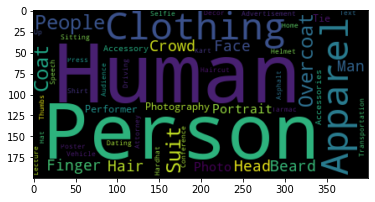

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

display(plt.imshow(wordcloud, interpolation='bilinear'))